In [42]:
import scipy
import pandas as pd
import numpy as np
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import NMF


fing = scipy.io.loadmat("/content/drive/MyDrive/Dataset/Subject3/Trial 1/SR_thumb.mat")["Dynamic_8"][0][0]
emg1 = fing[7][0][0][9]

In [34]:
""" FOR NINA PRO
df1 = scipy.io.loadmat("/content/drive/MyDrive/AVH/EMG/S1_E1_A1.mat")
emg1 = pd.DataFrame(df1["emg"])
emg11=emg1.values


stimulus = pd.DataFrame(df1["stimulus"])
n=np.array(stimulus)
newemg=np.empty((0,12))
cnt=0
for i in n :
    if(i==1):
      row=np.array(emg11[cnt])
      newemg = np.vstack([newemg, row])
    cnt+=1

"""

' FOR NINA PRO\ndf1 = scipy.io.loadmat("/content/drive/MyDrive/AVH/EMG/S1_E1_A1.mat")\nemg1 = pd.DataFrame(df1["emg"])\nemg11=emg1.values\n\n\nstimulus = pd.DataFrame(df1["stimulus"])\nn=np.array(stimulus)\nnewemg=np.empty((0,12))\ncnt=0\nfor i in n :\n    if(i==1):\n      row=np.array(emg11[cnt])\n      newemg = np.vstack([newemg, row])\n    cnt+=1\n\n'

In [43]:

scaler1=StandardScaler()
scaler1.fit(emg1)
scaled_data1=scaler1.transform(emg1)
min_value = np.min(scaled_data1)
if min_value < 0:
    scaled_data1 = scaled_data1 - min_value

In [44]:
# Set the number of components (i.e., basis functions) to 4
n_components = 4

# Set the maximum number of iterations to 10000 and enable verbose output
max_iter = 10000
model = NMF(n_components=n_components, max_iter=max_iter, verbose=True)
#The verbose=True parameter in the NMF constructor enables verbose output, which means that the NMF algorithm will print progress updates and other information during the optimization process.

# Scale the input data to have zero mean and unit variance

# This is often done to ensure that all channels have equal importance in the analysis
#scaled_data1 = scale(scaled_data1)

# Fit the NMF model to the scaled data
# The fit_transform method returns the activation coefficients (W) and basis functions (H)
W = model.fit_transform(scaled_data1)
H = model.components_
"""
def nmf(X, n_components, max_iter=1000, tol=1e-4):

  #IMPLEMENTATION USING NUMPY FOR FURTHER ILLUSTRATION

    W = np.random.rand(X.shape[0], n_components)
    H = np.random.rand(n_components, X.shape[1])

    # Repeat until convergence or maximum number of iterations is reached
    for i in range(max_iter):
        # Update H while fixing W
        H *= np.dot(W.T, X) / (np.dot(np.dot(W.T, W), H) + 1e-9)

        # Update W while fixing H
        W *= np.dot(X, H.T) / (np.dot(W, np.dot(H, H.T)) + 1e-9)

        # Calculate the approximation error and check for convergence
        approx_error = np.linalg.norm(X - np.dot(W, H))
        if approx_error < tol:
            break

    return W, H
"""

"""
W is the matrix of activation coefficients,
which represents the contribution of each basis function to each time point in the input data.
Each row of W corresponds to a time point in the input data, and each column corresponds to a basis function.
The values in W are non-negative and indicate the strength of the contribution of each basis function to each time point in the input data.
In other words, W tells us how much of each basis function is present at each time point in the input data.
"""

"""
H is the matrix of basis functions, which represents the templates that are learned from the input data.
Each row of H corresponds to a basis function, and each column corresponds to a channel in the input data.
The values in H are also non-negative and indicate the shape or waveform of each basis function.
"""

# Get the approximation error of the NMF fit
# The reconstruction_err_ attribute returns the Frobenius norm of the difference between the input data and the reconstructed data
#The Frobenius norm of a matrix M is defined as the square root of the sum of the squared elements of M.
approx_error = model.reconstruction_err_
print(f"Factor matrices: W.shape={W.shape}, H.shape={H.shape}")
print(f"Approximation error: {approx_error:.3f}")
recon_error_percent = 100 * approx_error / np.sum( scaled_data1)
print(recon_error_percent)

violation: 1.0
violation: 0.005433587426499291
violation: 0.001701211499318451
violation: 0.0016189945276106803
violation: 0.0017063085859997452
violation: 0.0015080673899416526
violation: 0.0012024196079361959
violation: 0.0009530402767272861
violation: 0.0007777829479094595
violation: 0.0006531324750788808
violation: 0.0005662547968717885
violation: 0.0005068419221613484
violation: 0.00046879146398490256
violation: 0.000438942214402206
violation: 0.0004121280039755349
violation: 0.00038852979603445985
violation: 0.00036787609665601625
violation: 0.0003509359189022181
violation: 0.00033488174505819416
violation: 0.0003203266819298967
violation: 0.0003080915613711802
violation: 0.00029640228609861195
violation: 0.0002830749867699567
violation: 0.00027306458140657235
violation: 0.000261475529661776
violation: 0.00025195429732895956
violation: 0.00024294844855868262
violation: 0.0002352152711742128
violation: 0.00022495653751410533
violation: 0.00021299021510426023
violation: 0.000203103

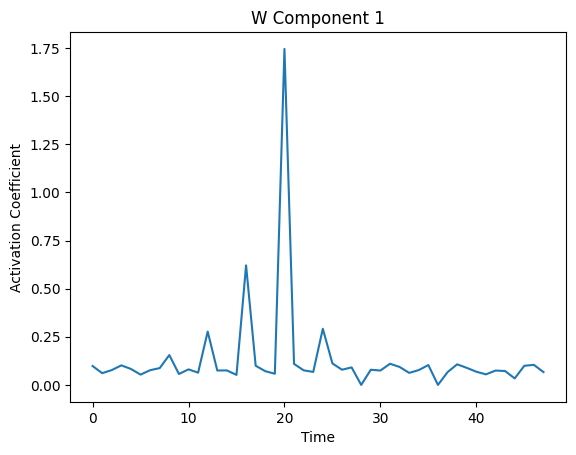

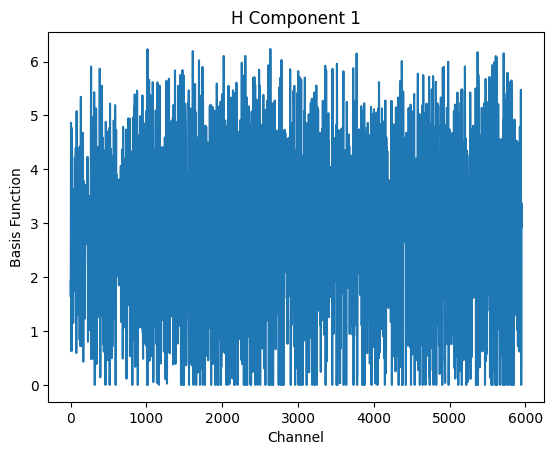

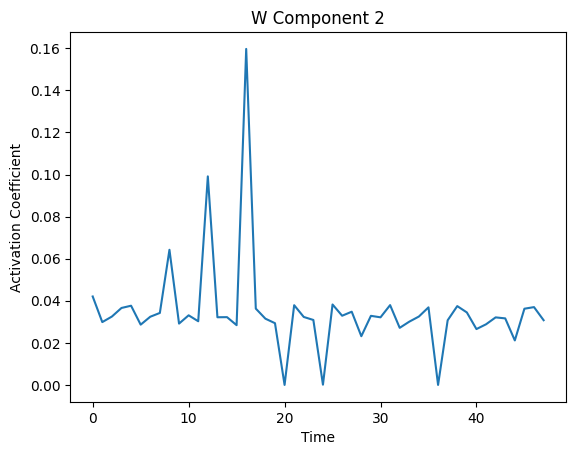

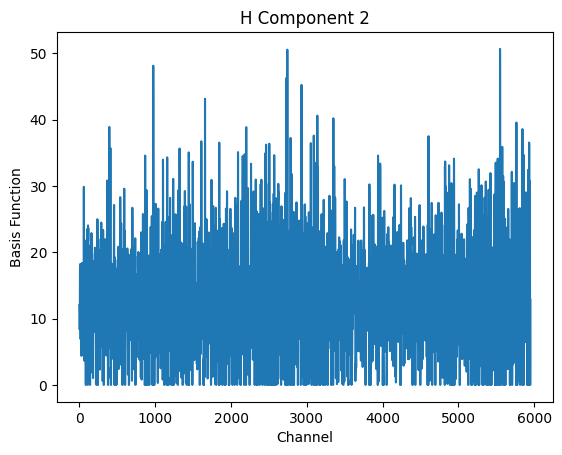

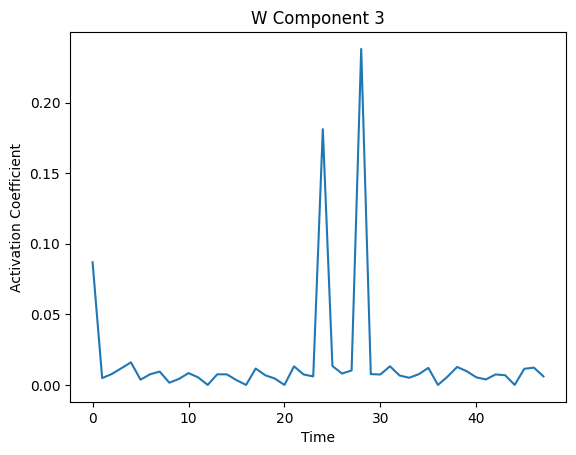

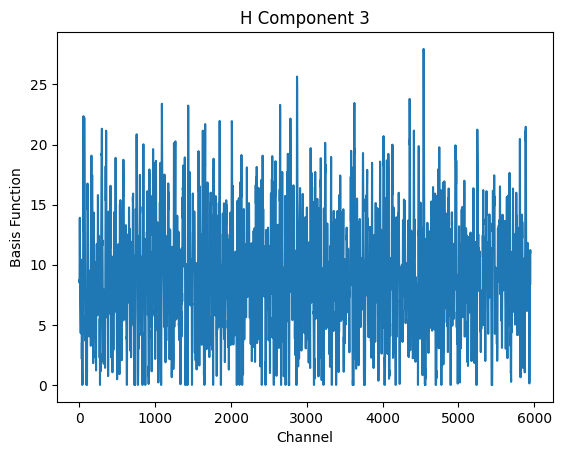

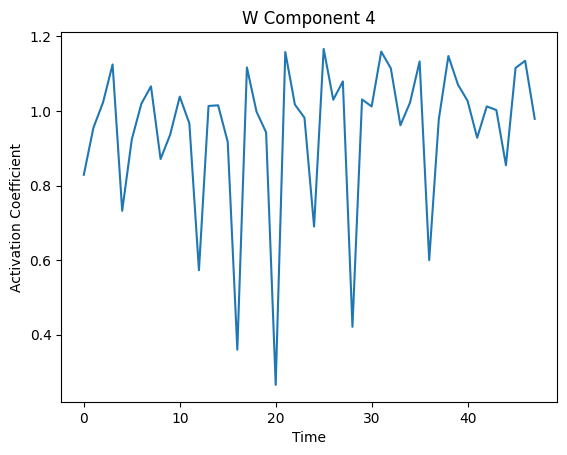

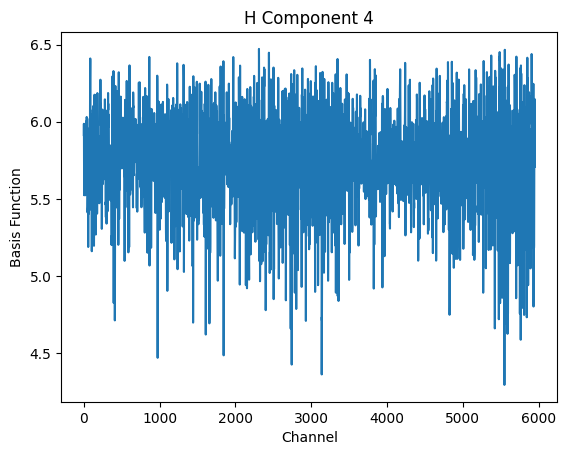

In [45]:
import matplotlib.pyplot as plt
for i in range(n_components):
    plt.figure()
    plt.plot(W[:, i])
    plt.title(f'W Component {i+1}')
    plt.xlabel('Time')
    plt.ylabel('Activation Coefficient')
    plt.show()
    plt.figure()
    plt.plot(H[i, :])
    plt.title(f'H Component {i+1}')
    plt.xlabel('Channel')
    plt.ylabel('Basis Function')
    plt.show()
